# Задание 1

In [37]:
import pandas as pd

url = 'math_students.csv'
data = pd.read_csv(url, on_bad_lines='skip', delimiter=',')
data.head()

13035

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", предпочтение некоторым предметам - "course" или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - количество ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хороши отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - G3 - итоговая оценка (от 0 до 20)

Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.

In [19]:
data['reason'].value_counts().idxmax()

'course'

Найдите количество студентов, у родителей которых нет никакого образования.

In [40]:
data.query('Medu == 0 & Fedu == 0').shape[0]

0

Найдите минимальный возраст учащегося школы Mousinho da Silveira.

In [31]:
data.query("school == 'MS'")['age'].min()

17

Найдите количество студентов, имеющих нечетное число пропусков.

In [41]:
data[data['absences'] % 2 == 1].shape[0]

41

Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [47]:
romantic_mean = data.query("romantic == 'yes'")['G3'].mean()
not_romantic_mean = data.query("romantic == 'no'")['G3'].mean()

round(romantic_mean - not_romantic_mean, 2)

-1.26

Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

*Примечание. В данном контексте под "большинством" подразумеваются студенты, имеющее самое частое значение пропусков. То есть в данном задании необходимо:*


* *Определить самое частое значение наличия внеклассных активностей (да или нет).*
* *Для группы студентов, соответствующей этому значению, рассмотреть значения признака «число пропусков».*
* *Для каждого значения числа пропусков посчитать, сколько студентов ему соответствует.*
* *Выбрать значение числа пропусков с наибольшим числом студентов.*

In [60]:
most_common_activity = data['activities'].value_counts().idxmax()
data[data['activities'] == most_common_activity]['absences'].value_counts().idxmax()

0

# Задание 2

In [61]:
url = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv'
data = pd.read_csv(url, on_bad_lines='skip', delimiter=',')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [65]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Значение столбцов таблицы:

* PassengerId — идентификатор пассажира
* Survival — поле в котором указано спасся человек (1) или нет (0)
* Pclass — содержит социально-экономический статус:
    - высокий
    - средний
    - низкий
* Name — имя пассажира
* Sex — пол пассажира
* Age — возраст
* SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)
* Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)
* Ticket — номер билета
* Fare — цена билета
* Cabin — каюта
* Embarked — порт посадки
    - C — Cherbourg
    - Q — Queenstown
    - S — Southampton

Сколько мужчин / женщин находилось на борту?

In [66]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужщин 2-го класса?

In [68]:
data['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

In [77]:
data.query("Sex == 'male'")['Pclass'].value_counts(normalize=True)

Pclass
3    0.601386
1    0.211438
2    0.187175
Name: proportion, dtype: float64

In [71]:
data.query("Sex == 'female'")['Pclass'].value_counts(normalize=True)

Pclass
3    0.458599
1    0.299363
2    0.242038
Name: proportion, dtype: float64

In [75]:
data.query("Sex == 'male' & Pclass == 2").shape[0]

108

Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

In [73]:
round(data['Fare'].median(), 2)

14.45

In [74]:
round(data['Fare'].std(), 2)

49.69

Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

In [90]:
survived_young = data.query("Age < 30 & Survived == 1").shape[0]
survived_old = data.query("Age > 60 & Survived == 1").shape[0]
survived_young > survived_old

True

In [102]:
data.query("Age < 30")["Survived"].value_counts(normalize=True).loc[1]

0.40625

In [101]:
data.query("Age > 60")["Survived"].value_counts(normalize=True).loc[1]

0.22727272727272727

Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [103]:
survived_male = data.query("Sex =='male' & Survived == 1").shape[0]
survived_female = data.query("Sex =='female' & Survived == 1").shape[0]
survived_female > survived_male

True

In [107]:
data.query("Sex =='male'")["Survived"].value_counts(normalize=True).loc[1]

0.18890814558058924

In [105]:
data.query("Sex =='female'")["Survived"].value_counts(normalize=True).loc[1]

0.7420382165605095

Найдите самое популярное имя среди пассажиров Титаника мужского пола?

In [130]:
data.query("Sex =='male'")['Name'].apply(lambda x: x.split(',')[0]).value_counts().idxmax()

'Panula'

Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

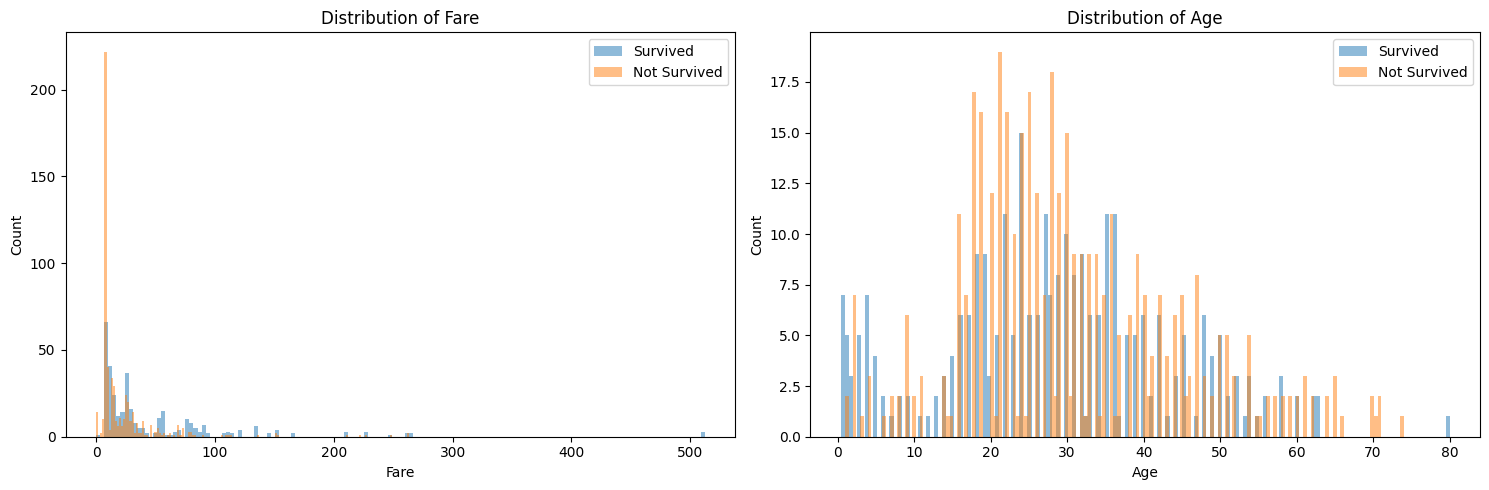

In [147]:
import matplotlib.pyplot as plt

survived_data = data[data['Survived'] == 1]
not_survived_data = data[data['Survived'] == 0]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(survived_data['Fare'], bins=150, alpha=0.5, label='Survived')
plt.hist(not_survived_data['Fare'], bins=150, alpha=0.5, label='Not Survived')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Fare')

plt.subplot(1, 2, 2)
plt.hist(survived_data['Age'].dropna(), bins=150, alpha=0.5, label='Survived')
plt.hist(not_survived_data['Age'].dropna(), bins=150, alpha=0.5, label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()

In [151]:
avg_age_not_survived = data.query("Survived == 0")['Age'].mean()
avg_age_survived = data.query("Survived == 1")['Age'].mean()
avg_age_not_survived > avg_age_survived

28.343689655172415

Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1-ом классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [160]:
data.query("Sex == 'male' & Pclass == 1")['Age'].mean() > 40

True

In [163]:
data.query("Sex == 'female' & Pclass == 1")['Age'].mean() > 40

False

In [165]:
print(data.groupby(['Pclass', 'Sex'])['Age'].mean())
print("Ответ: да")

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64
Ответ: да


In [168]:
class1 = data.query("Pclass == 1")['Age'].mean()
class2 = data.query("Pclass == 2")['Age'].mean()
class3 = data.query("Pclass == 3")['Age'].mean()

print(class1, class2, class3)
print(class1 > class2 > class3)

38.233440860215055 29.87763005780347 25.14061971830986
True
